In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import joblib

## Load data
Load the file into a pandas DataFrame.


In [ ]:
df = pd.read_csv('combined_dataset.csv')
display(df.head())
print(df.shape)

,Age,Gender,Smoking Status,Alcohol Consumption,Co-morbidities,Exercise Frequency,Blood Pressure,Avg Blood Sugar 8 Months,Avg Systolic BP 8 Months,Avg Diastolic BP 8 Months,Weight_kg,Allergies,Past_Diseases,Drugs,Past_Drugs_Used,Height_cm,Blood_Type
0,54,male,Former Smoker,Occasional,Hypertension (HTN),3 times/week,129/90,177.125,124.750,83.750,82.19686,Mold,Psoriasis,Sertraline,Simvastatin,148.535606,AB+
1,64,male,Non-Smoker,Occasional,intermittent pedal swelling,3 times/week,169/70,132.250,158.875,70.000,79.69686,Mold,Psoriasis,Sertraline,Simvastatin,145.035606,AB+
2,21,female,Former Smoker,Occasional,intermittent pedal swelling,3 times/week,105/93,179.250,100.500,87.625,63.19686,Mold,Psoriasis,Sertraline,Simvastatin,139.035606,AB+
3,29,female,Non-Smoker,Occasional,intermittent pedal swelling,5 times/week,132/78,184.875,126.500,75.250,70.19686,Mold,Psoriasis,Sertraline,Simvastatin,141.535606,AB+
4,69,female,Non-Smoker,Occasional,Hypertension (HTN),2 times/week,108/80,178.750,103.500,77.625,68.19686,Mold,Psoriasis,Sertraline,Simvastatin,141.535606,AB+


(11432, 17)


## Exploratory data analysis (eda)

Perform thorough EDA to understand the data distribution, identify missing values, outliers, and explore relationships between variables. This will include several visualizations.


In [ ]:
df.info()
display(df.describe())
display(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11432 entries, 0 to 11431
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        11432 non-null  int64  
 1   Gender                     11432 non-null  object 
 2   Smoking Status             11432 non-null  object 
 3   Alcohol Consumption        11432 non-null  object 
 4   Co-morbidities             11432 non-null  object 
 5   Exercise Frequency         11432 non-null  object 
 6   Blood Pressure             11432 non-null  object 
 7   Avg Blood Sugar 8 Months   11432 non-null  float64
 8   Avg Systolic BP 8 Months   11432 non-null  float64
 9   Avg Diastolic BP 8 Months  11432 non-null  float64
 10  Weight_kg                  11432 non-null  float64
 11  Allergies                  11432 non-null  object 
 12  Past_Diseases              11432 non-null  object 
 13  Drugs                      11432 non-null  obj

,Age,Avg Blood Sugar 8 Months,Avg Systolic BP 8 Months,Avg Diastolic BP 8 Months,Weight_kg,Height_cm
count,11432.000000,11432.000000,11432.000000,11432.000000,11432.000000,11432.000000
mean,46.500000,14.924364,9.998654,5.932771,41.604944,68.482513
std,25.463187,36.917015,25.160459,15.844853,20.819098,26.496397
min,1.000000,7.140559,4.622529,2.544043,6.264494,28.251093
25%,26.000000,7.140559,4.622529,2.544043,23.814494,47.188593
50%,46.000000,7.140559,4.622529,2.544043,41.014494,66.001093
75%,69.000000,7.140559,4.622529,2.544043,59.614494,86.351093
max,89.000000,244.875000,158.875000,89.125000,87.196860,154.035606


,0
Age,0
Gender,0
Smoking Status,0
Alcohol Consumption,0
Co-morbidities,0
Exercise Frequency,0
Blood Pressure,0
Avg Blood Sugar 8 Months,0
Avg Systolic BP 8 Months,0
Avg Diastolic BP 8 Months,0


Creating histograms and box plots for numerical columns to visualize their distributions and identify potential outliers as part of the EDA process.



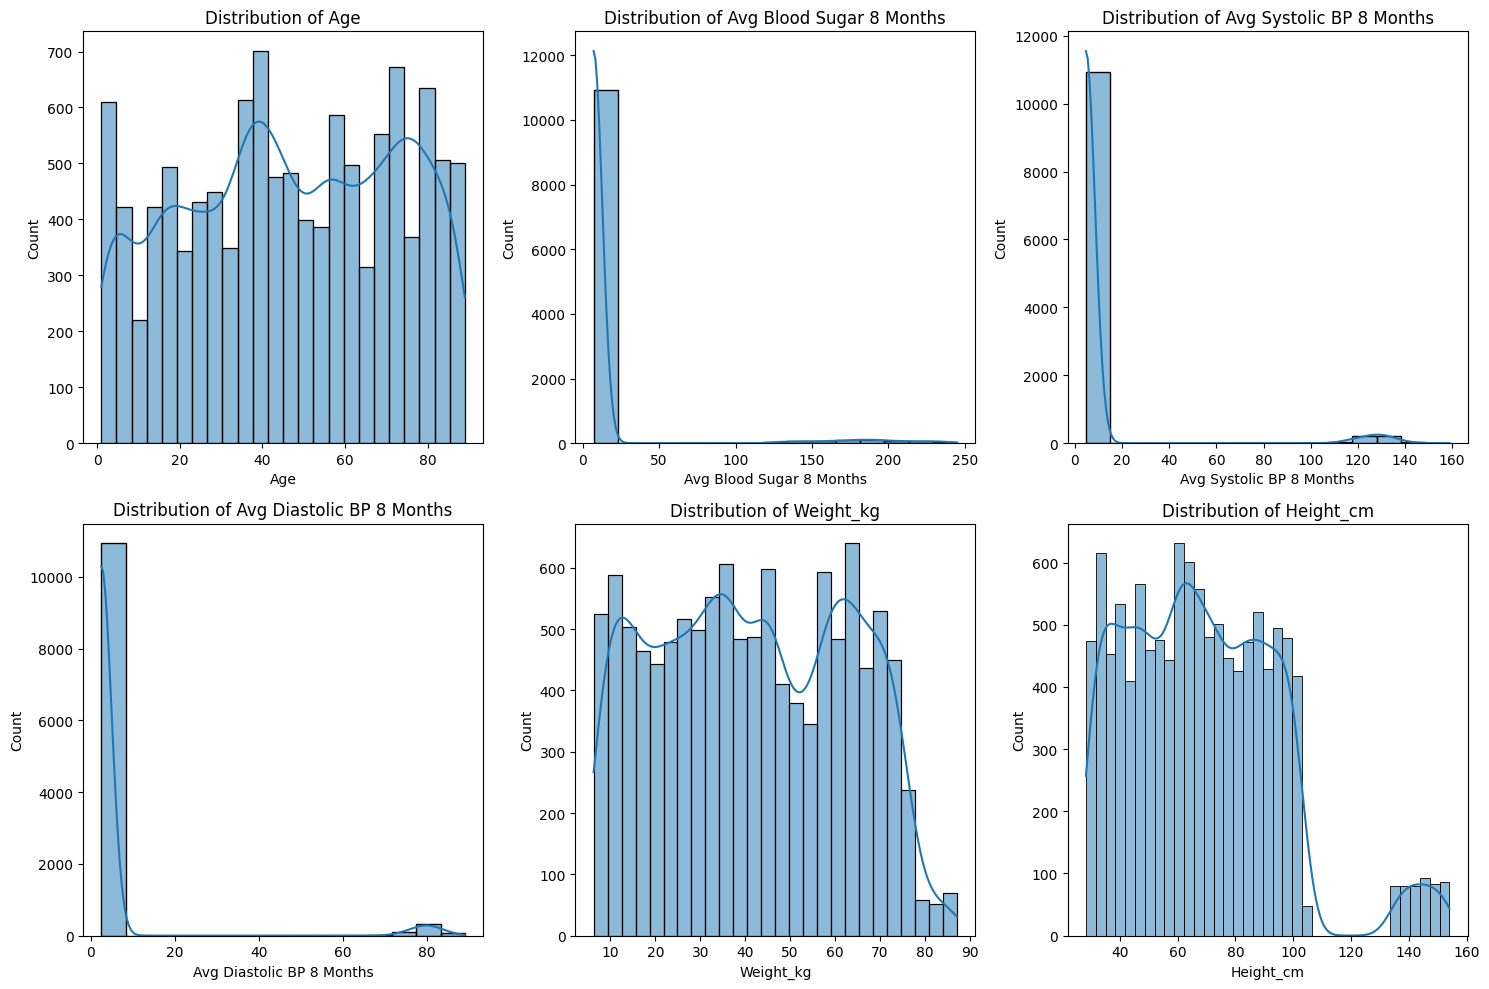

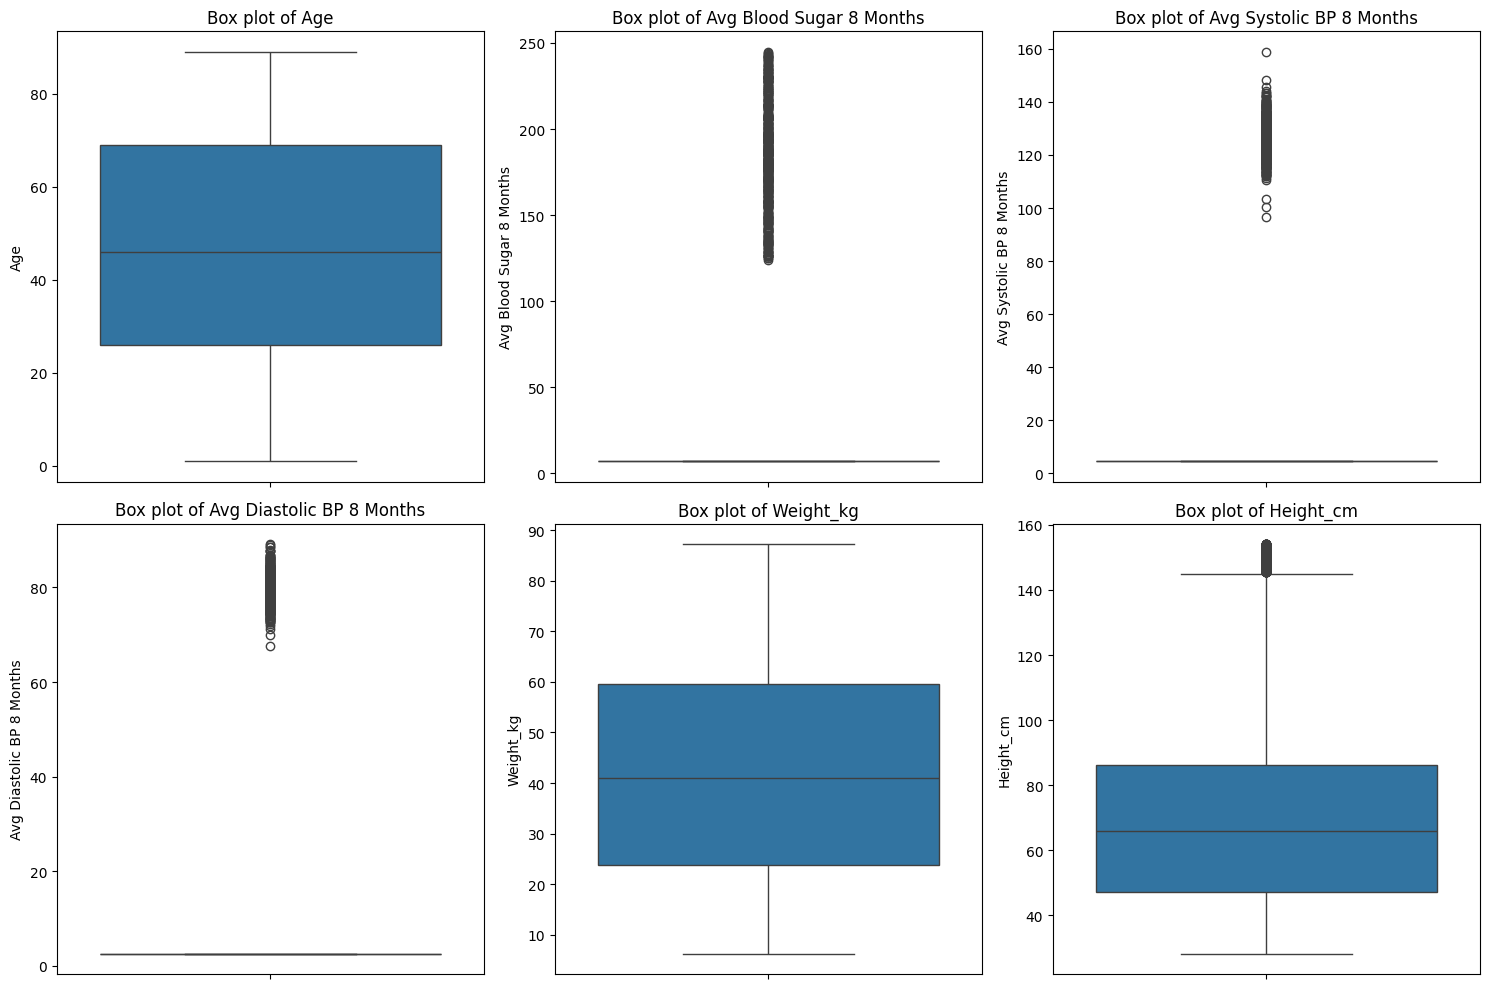

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

Next is plotting a correlation matrix and display it as a heatmap for the numerical columns to explore the relationships between them. Also, create count plots for categorical columns to understand their frequency distributions.



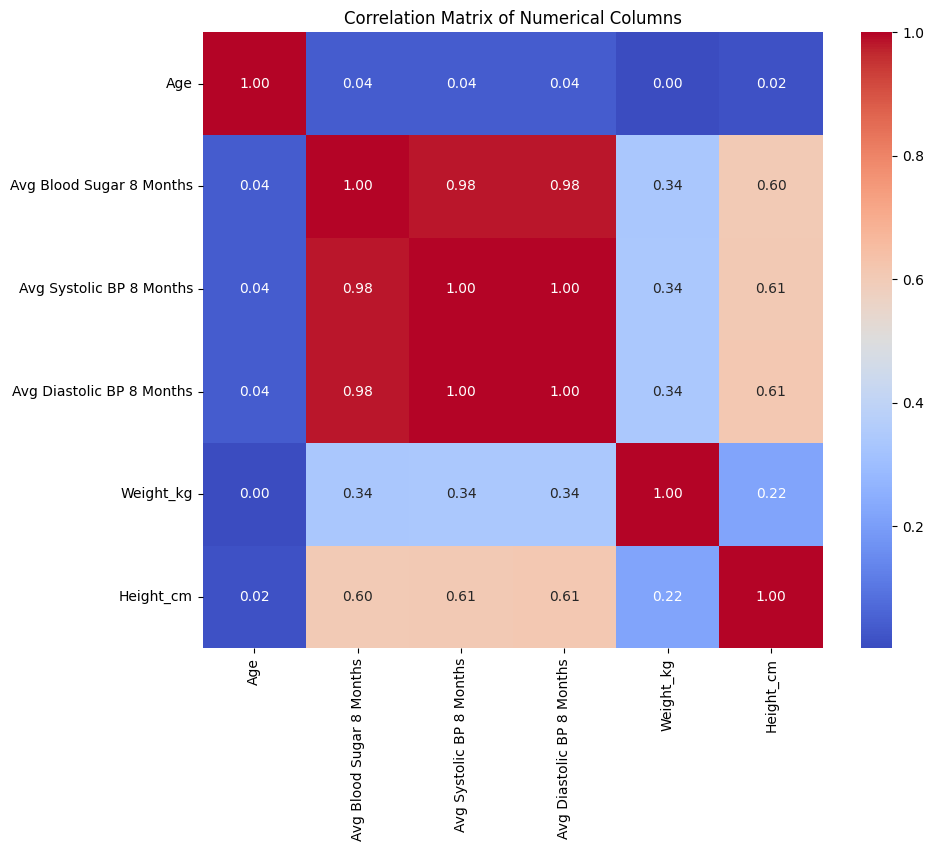

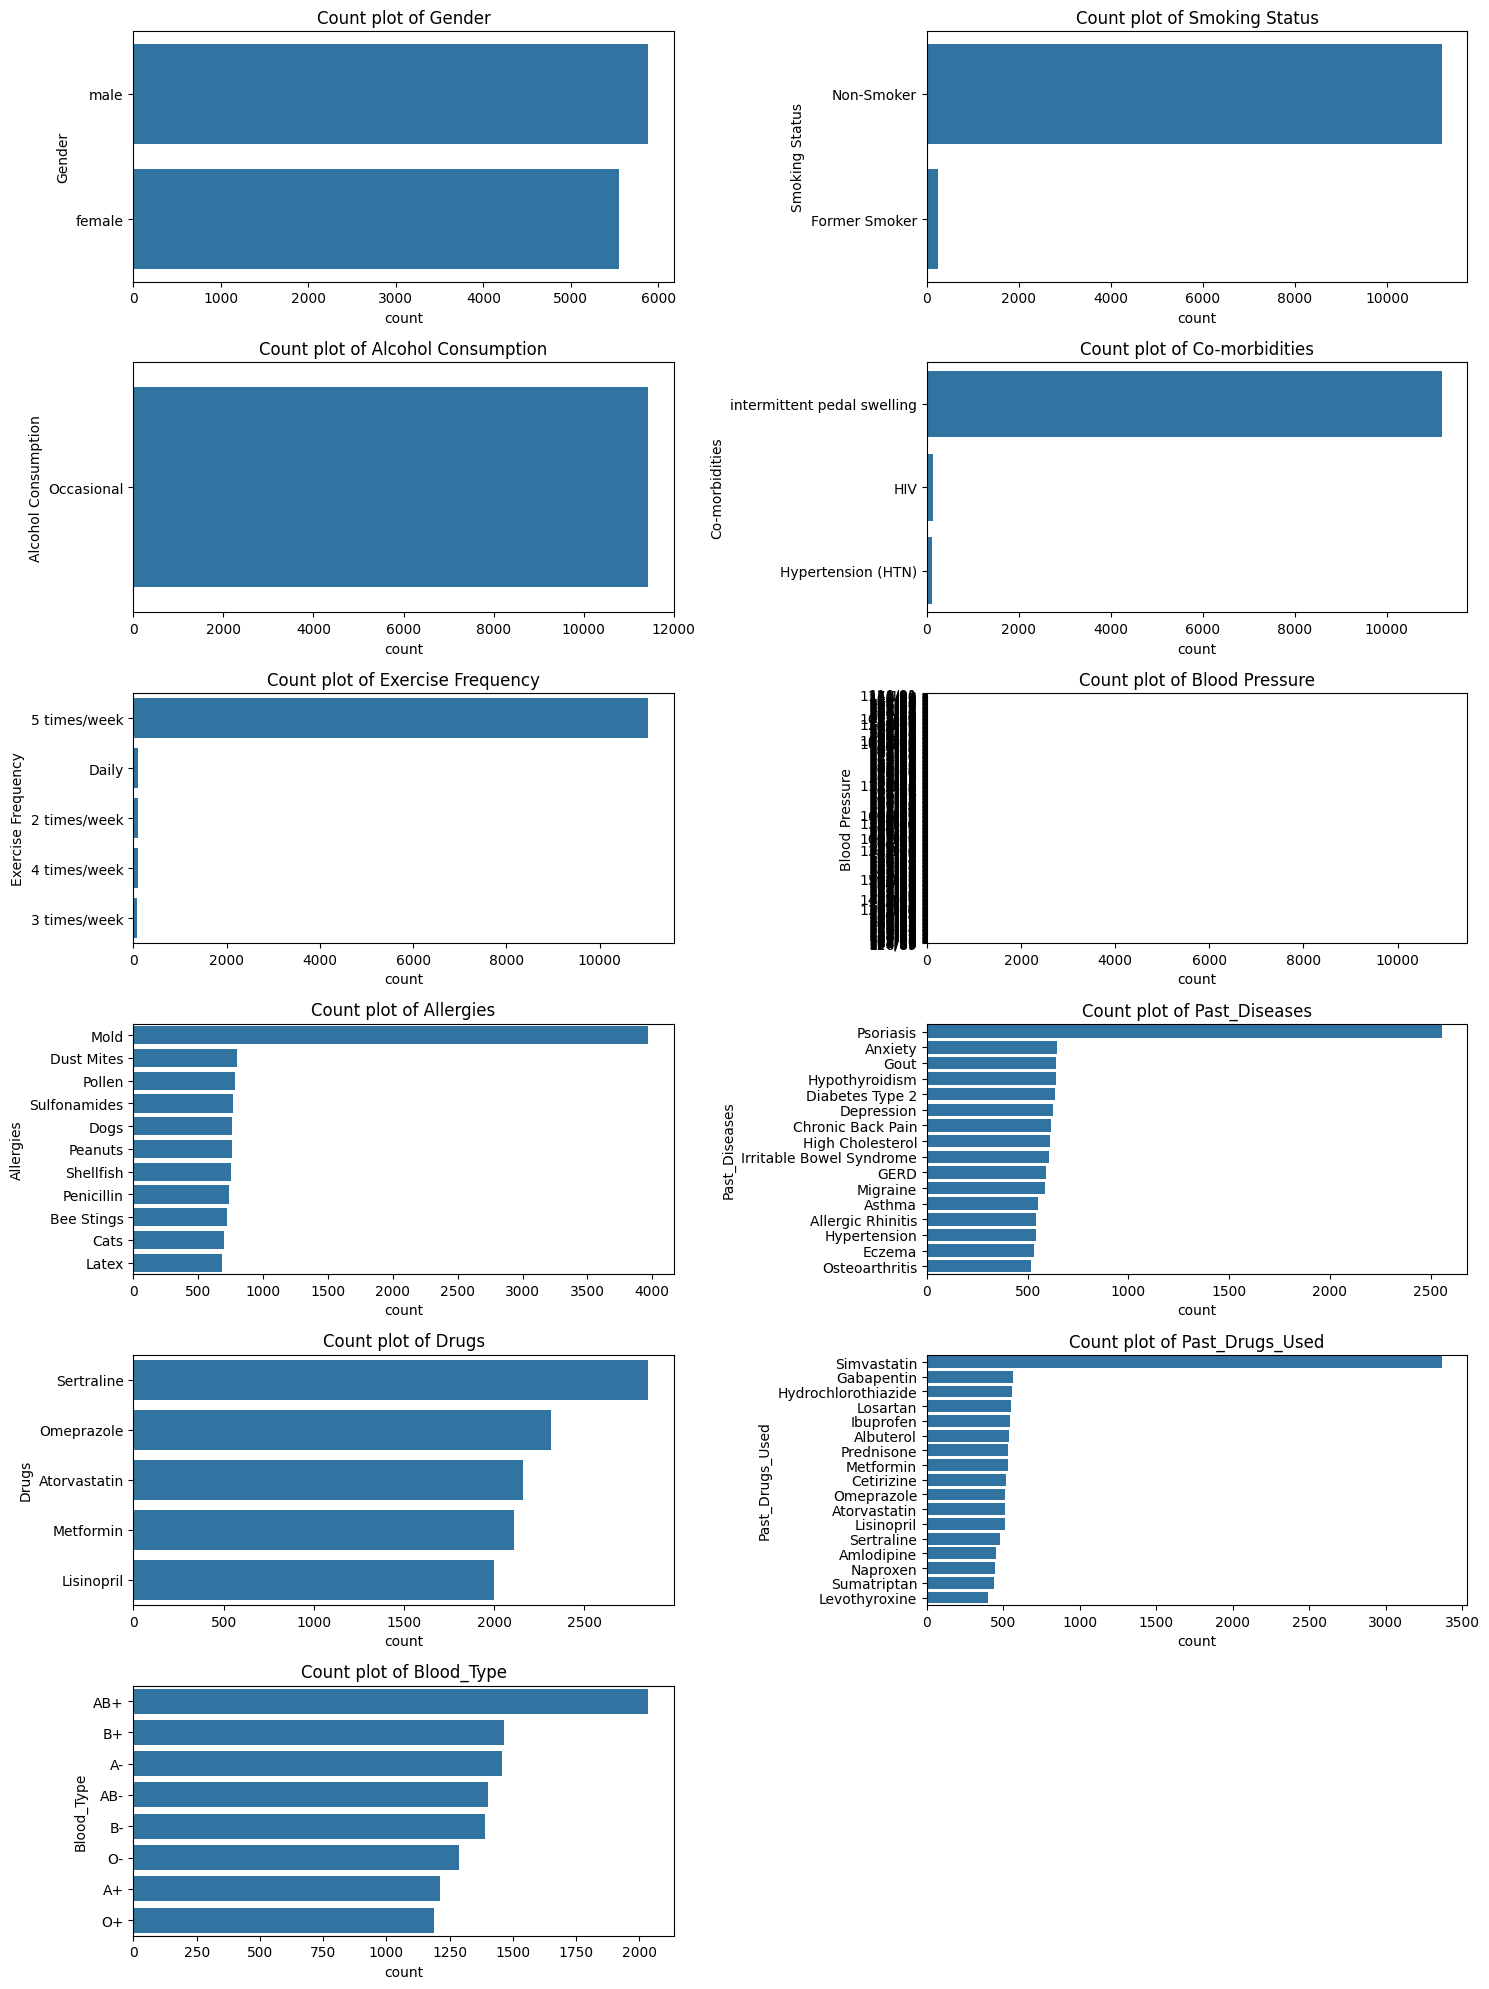

In [ ]:
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

categorical_cols = df.select_dtypes(include='object').columns

plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_cols):
    plt.subplot(6, 2, i + 1)
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Count plot of {col}')
plt.tight_layout()
plt.show()

## Summary of the EDA

The dataset contains 11432 entries with 17 columns, including numerical and categorical features. There are no missing values in any of the columns.

**Numerical Features**:
- **Age**: The distribution of age is somewhat spread out, with a noticeable peak around the 40-60 age range and also at younger ages. The box plot shows some potential outliers at both ends of the age spectrum.
- **Avg Blood Sugar 8 Months, Avg Systolic BP 8 Months, Avg Diastolic BP 8 Months**: These features show highly skewed distributions, with most values clustered at the lower end and a few outliers at higher values. The correlation matrix shows a very high positive correlation among these three variables (close to 1), suggesting they are strongly related.
- **Weight_kg**: The distribution of weight is somewhat spread out, with a peak around 40-60 kg. The box plot shows some potential outliers at the higher end.
- **Height_cm**: The distribution of height is somewhat spread out, with peaks around 40-60 cm and another peak at higher values. The box plot shows some potential outliers at the higher end.

**Categorical Features**:
- The count plots show the frequency distribution of each categorical variable.
    - **Gender**: The dataset has a roughly equal distribution of male and female.
    - **Smoking Status**: The majority of individuals are Non-Smokers, followed by Former Smokers.
    - **Alcohol Consumption**: Most individuals have Occasional alcohol consumption.
    - **Co-morbidities**: 'intermittent pedal swelling' is the most frequent co-morbidity, followed by 'Hypertension (HTN)'.
    - **Exercise Frequency**: '3 times/week' is the most common exercise frequency, followed by '5 times/week' and '2 times/week'. Other frequencies are less common.
    - **Blood Pressure**: There are many unique values for blood pressure, which might require further processing or feature engineering.
    - **Allergies, Past_Diseases, Drugs, Past_Drugs_Used, Blood_Type**: These columns have multiple categories with varying frequencies. Some categories are much more frequent than others.

Overall, the EDA revealed that the numerical features related to blood measurements have skewed distributions and are highly correlated. The categorical features have diverse distributions across their categories. The dataset has no missing values, which simplifies the preprocessing steps. The 'Blood Pressure' column has a large number of unique values that might need special handling (splitting into its systolic and diastolic pair).

In [ ]:
# split blood pressure into systlic and diastolic pairs
df[['Systolic BP', 'Diastolic BP']] = df['Blood Pressure'].str.split('/', expand=True).astype(np.int64)
df.drop('Blood Pressure', axis=1, inplace=True)
df.head()

,Age,Gender,Smoking Status,Alcohol Consumption,Co-morbidities,Exercise Frequency,Avg Blood Sugar 8 Months,Avg Systolic BP 8 Months,Avg Diastolic BP 8 Months,Weight_kg,Allergies,Past_Diseases,Drugs,Past_Drugs_Used,Height_cm,Blood_Type,Systolic BP,Diastolic BP
0,54,male,Former Smoker,Occasional,Hypertension (HTN),3 times/week,177.125,124.750,83.750,82.19686,Mold,Psoriasis,Sertraline,Simvastatin,148.535606,AB+,129,90
1,64,male,Non-Smoker,Occasional,intermittent pedal swelling,3 times/week,132.250,158.875,70.000,79.69686,Mold,Psoriasis,Sertraline,Simvastatin,145.035606,AB+,169,70
2,21,female,Former Smoker,Occasional,intermittent pedal swelling,3 times/week,179.250,100.500,87.625,63.19686,Mold,Psoriasis,Sertraline,Simvastatin,139.035606,AB+,105,93
3,29,female,Non-Smoker,Occasional,intermittent pedal swelling,5 times/week,184.875,126.500,75.250,70.19686,Mold,Psoriasis,Sertraline,Simvastatin,141.535606,AB+,132,78
4,69,female,Non-Smoker,Occasional,Hypertension (HTN),2 times/week,178.750,103.500,77.625,68.19686,Mold,Psoriasis,Sertraline,Simvastatin,141.535606,AB+,108,80


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11432 entries, 0 to 11431
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        11432 non-null  int64  
 1   Gender                     11432 non-null  object 
 2   Smoking Status             11432 non-null  object 
 3   Alcohol Consumption        11432 non-null  object 
 4   Co-morbidities             11432 non-null  object 
 5   Exercise Frequency         11432 non-null  object 
 6   Avg Blood Sugar 8 Months   11432 non-null  float64
 7   Avg Systolic BP 8 Months   11432 non-null  float64
 8   Avg Diastolic BP 8 Months  11432 non-null  float64
 9   Weight_kg                  11432 non-null  float64
 10  Allergies                  11432 non-null  object 
 11  Past_Diseases              11432 non-null  object 
 12  Drugs                      11432 non-null  object 
 13  Past_Drugs_Used            11432 non-null  obj

## Split data


Splitting the data into features (X) and target variable (y), then split them into training and testing sets, then preprocessing after, to avoid data leakage.



In [ ]:
X = df.drop('Drugs', axis=1)
y = df['Drugs']

# Label encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (9145, 17)
Shape of X_test: (2287, 17)
Shape of y_train: (9145,)
Shape of y_test: (2287,)


## Preprocessing with Pipeline

I will create a preprocessing pipeline to handle categorical and numerical features, including encoding and scaling.

In [ ]:
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

## Model Training (Logistic Regression)

In [ ]:
log_reg_model = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', LogisticRegression(max_iter=1000))])

log_reg_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'Avg Blood Sugar 8 Months', 'Avg Systolic BP 8 Months',
       'Avg Diastolic BP 8 Months', 'Weight_kg', 'Height_cm', 'Systolic BP',
       'Diastolic BP'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Gender', 'Smoking Status', 'Alcohol Consumption', 'Co-morbidities',
       'Exercise Frequency', 'Allergies', 'Past_Diseases', 'Past_Drugs_Used',
       'Blood_Type'],
      dtype='object'))])),
                ('classifier', LogisticRegression(max_iter=1000))])

## Model Evaluation (Logistic Regression)

Evaluating the Logistic Regression model using accuracy, classification report, and a confusion matrix plot.

Logistic Regression Model Evaluation:
Accuracy: 0.31219938784433754

Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.25      0.27       446
           1       0.25      0.23      0.24       392
           2       0.26      0.22      0.24       423
           3       0.33      0.37      0.35       472
           4       0.37      0.44      0.40       554

    accuracy                           0.31      2287
   macro avg       0.30      0.30      0.30      2287
weighted avg       0.31      0.31      0.31      2287



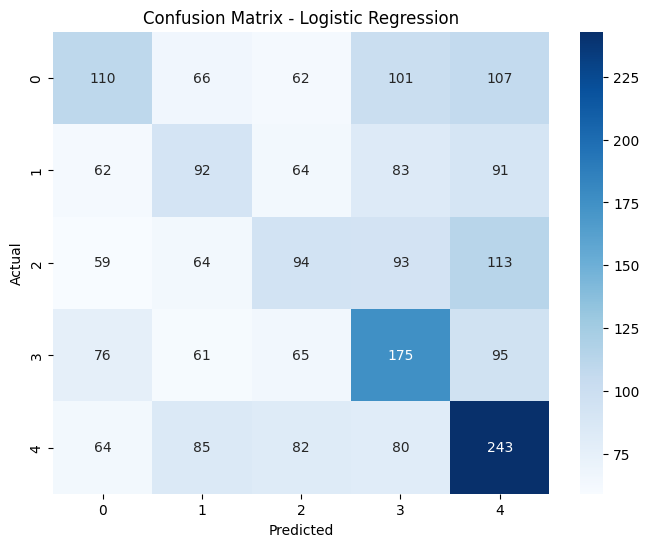

In [ ]:
y_pred_log_reg = log_reg_model.predict(X_test)

print("Logistic Regression Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log_reg))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Model Training (Decision Tree Classifier)

In [ ]:
dt_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', DecisionTreeClassifier(random_state=42))])

dt_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'Avg Blood Sugar 8 Months', 'Avg Systolic BP 8 Months',
       'Avg Diastolic BP 8 Months', 'Weight_kg', 'Height_cm', 'Systolic BP',
       'Diastolic BP'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Gender', 'Smoking Status', 'Alcohol Consumption', 'Co-morbidities',
       'Exercise Frequency', 'Allergies', 'Past_Diseases', 'Past_Drugs_Used',
       'Blood_Type'],
      dtype='object'))])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

## Model Evaluation (Decision Tree Classifier)
Evaluating the Decision Tree Classifier model using accuracy, classification report, and a confusion matrix plot.

Decision Tree Classifier Model Evaluation:
Accuracy: 0.9392216878006121

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93       446
           1       0.94      0.94      0.94       392
           2       0.93      0.90      0.92       423
           3       0.94      0.94      0.94       472
           4       0.95      0.97      0.96       554

    accuracy                           0.94      2287
   macro avg       0.94      0.94      0.94      2287
weighted avg       0.94      0.94      0.94      2287



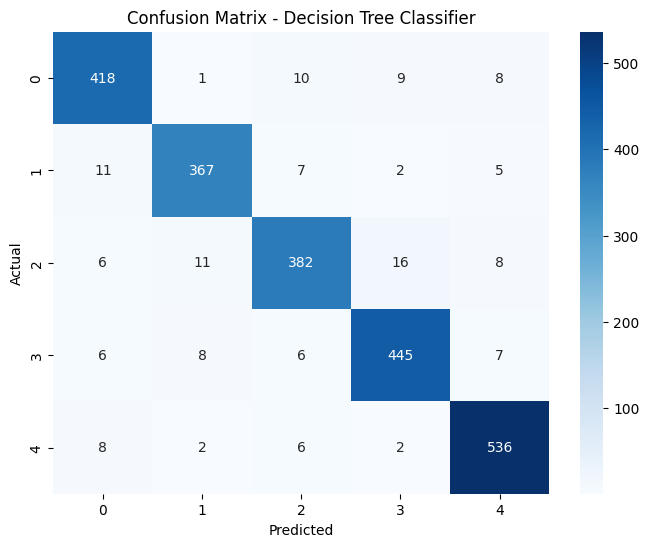

In [ ]:
y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Classifier Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Model Training (Random Forest Classifier)

In [ ]:
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', RandomForestClassifier(random_state=42))])

rf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'Avg Blood Sugar 8 Months', 'Avg Systolic BP 8 Months',
       'Avg Diastolic BP 8 Months', 'Weight_kg', 'Height_cm', 'Systolic BP',
       'Diastolic BP'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Gender', 'Smoking Status', 'Alcohol Consumption', 'Co-morbidities',
       'Exercise Frequency', 'Allergies', 'Past_Diseases', 'Past_Drugs_Used',
       'Blood_Type'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

## Model Evaluation (Random Forest Classifier)
Evaluating the Random Forest Classifier model using accuracy, classification report, and a confusion matrix plot.

Random Forest Classifier Model Evaluation:
Accuracy: 0.939658941845212

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94       446
           1       0.93      0.93      0.93       392
           2       0.95      0.91      0.93       423
           3       0.94      0.94      0.94       472
           4       0.94      0.95      0.95       554

    accuracy                           0.94      2287
   macro avg       0.94      0.94      0.94      2287
weighted avg       0.94      0.94      0.94      2287



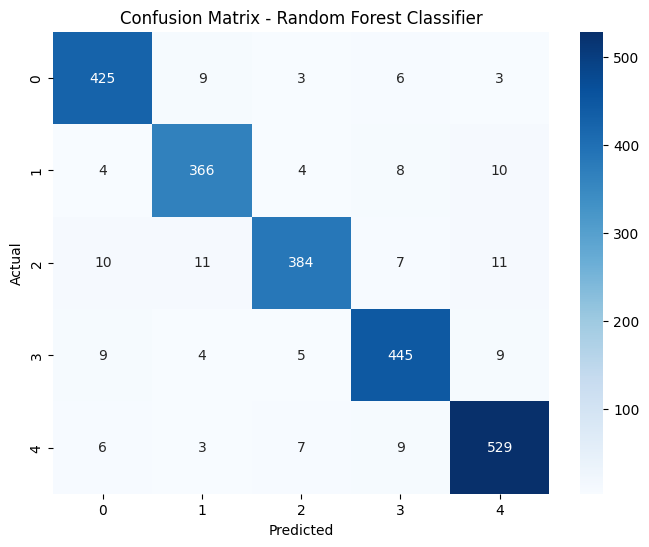

In [ ]:
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Classifier Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Model Training (Support Vector Classifier)



In [ ]:
svc_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', SVC(random_state=42))])

svc_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'Avg Blood Sugar 8 Months', 'Avg Systolic BP 8 Months',
       'Avg Diastolic BP 8 Months', 'Weight_kg', 'Height_cm', 'Systolic BP',
       'Diastolic BP'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Gender', 'Smoking Status', 'Alcohol Consumption', 'Co-morbidities',
       'Exercise Frequency', 'Allergies', 'Past_Diseases', 'Past_Drugs_Used',
       'Blood_Type'],
      dtype='object'))])),
                ('classifier', SVC(random_state=42))])

## Model Evaluation (Support Vector Classifier)
Evaluating the Support Vector Classifier model using accuracy, classification report, and a confusion matrix plot.

**Reasoning**:
Make predictions on the test data, calculate the accuracy score, generate the classification report, and plot the confusion matrix to evaluate the performance of the Support Vector Classifier model.

Support Vector Classifier Model Evaluation:
Accuracy: 0.5059029296020988

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.46      0.49       446
           1       0.40      0.46      0.43       392
           2       0.51      0.45      0.48       423
           3       0.54      0.50      0.52       472
           4       0.55      0.63      0.59       554

    accuracy                           0.51      2287
   macro avg       0.50      0.50      0.50      2287
weighted avg       0.51      0.51      0.51      2287



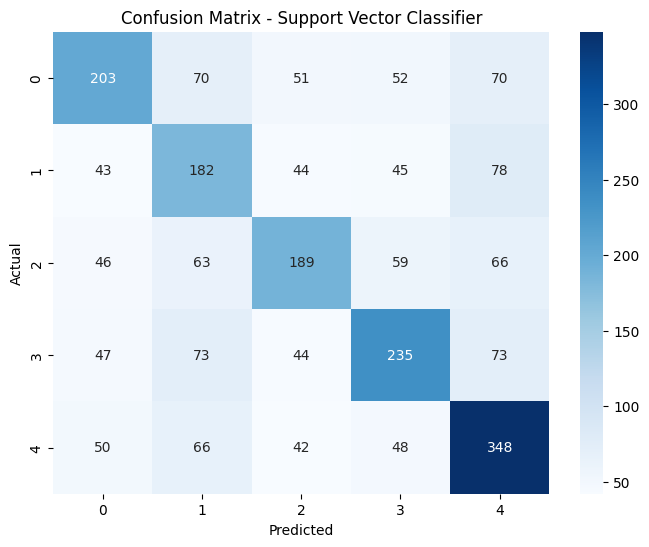

In [ ]:
y_pred_svc = svc_model.predict(X_test)

print("Support Vector Classifier Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_svc))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svc))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_svc), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Support Vector Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Model Training (XGBoost Classifier)

In [ ]:
xgb_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', XGBClassifier(random_state=42))])

xgb_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'Avg Blood Sugar 8 Months', 'Avg Systolic BP 8 Months',
       'Avg Diastolic BP 8 Months', 'Weight_kg', 'Height_cm', 'Systolic BP',
       'Diastolic BP'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Gender', 'Smoking Status', 'Alcohol Consumption', 'Co-morbidi...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

## Model Evaluation (XGBoost Classifier)

Evaluating the XGBoost Classifier model using accuracy, classification report, and a confusion matrix plot.

XGBoost Classifier Model Evaluation:
Accuracy: 0.9247923043288151

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       446
           1       0.91      0.92      0.92       392
           2       0.93      0.91      0.92       423
           3       0.94      0.93      0.93       472
           4       0.92      0.93      0.93       554

    accuracy                           0.92      2287
   macro avg       0.92      0.92      0.92      2287
weighted avg       0.92      0.92      0.92      2287



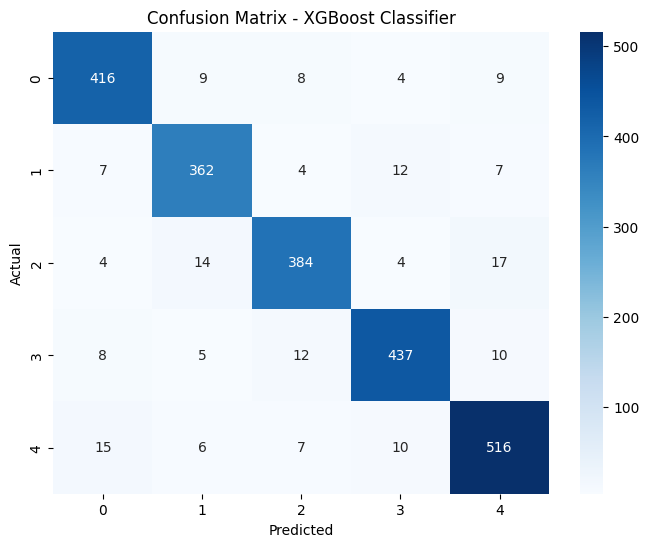

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Classifier Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# accuracy score df
accuracy_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier', 'Support Vector Classifier', 'XGBoost Classifier'],
    'Accuracy': [accuracy_score(y_test, y_pred_log_reg), accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_svc), accuracy_score(y_test, y_pred_xgb)]
})
accuracy_df.sort_values(by='Accuracy', ascending=False, inplace=True)
accuracy_df.reset_index(drop=True, inplace=True)
accuracy_df

,Model,Accuracy
0,Random Forest Classifier,0.939659
1,Decision Tree Classifier,0.939222
2,XGBoost Classifier,0.924792
3,Support Vector Classifier,0.505903
4,Logistic Regression,0.312199


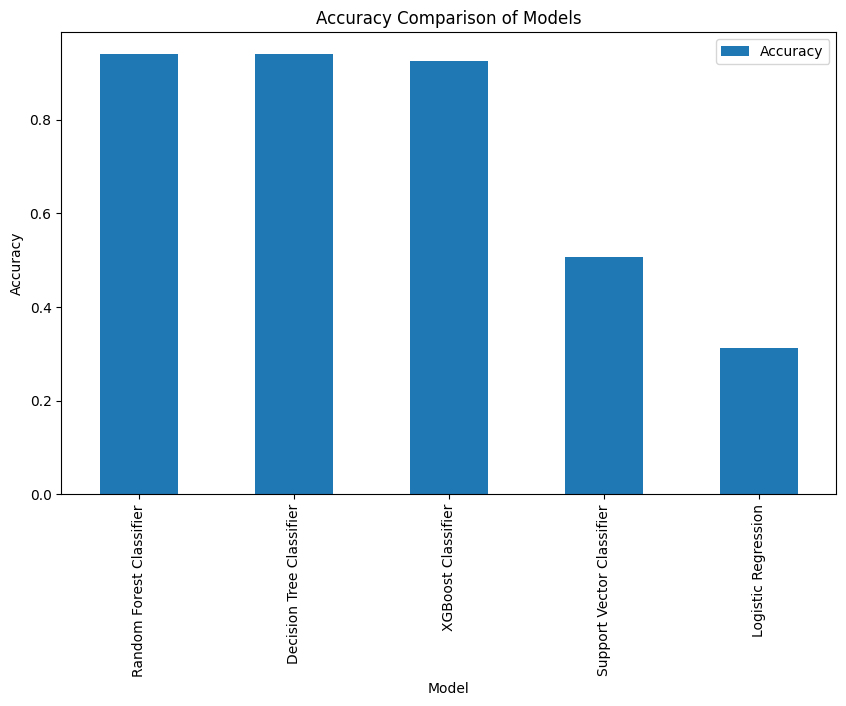

In [ ]:
accuracy_df.plot(x='Model', y='Accuracy', kind='bar', figsize=(10, 6))
plt.title('Accuracy Comparison of Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# feature importance of the best model
best_model = rf_model
feature_importances = best_model.named_steps['classifier'].feature_importances_
feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)
feature_importance_df

,Feature,Importance
5,num__Height_cm,0.158652
4,num__Weight_kg,0.156879
0,num__Age,0.143380
63,cat__Past_Drugs_Used_Simvastatin,0.021448
9,cat__Gender_male,0.020396
...,...,...
14,cat__Co-morbidities_Hypertension (HTN),0.000323
16,cat__Exercise Frequency_2 times/week,0.000322
18,cat__Exercise Frequency_4 times/week,0.000217
17,cat__Exercise Frequency_3 times/week,0.000166


Text(0.5, 0, 'Importance')

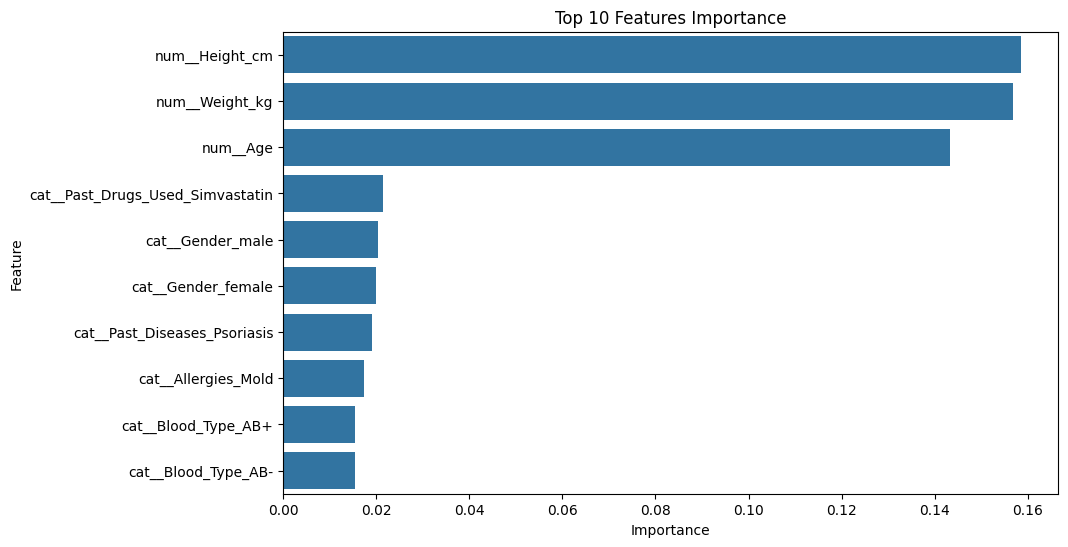

In [ ]:
# top 10 features importance plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Features Importance')
plt.xlabel('Importance')

## Model Evaluation Summary

Here is a summary of the performance of the models trained:

*   **Logistic Regression:** Achieved an accuracy of 0.31. This model performed poorly across all classes, as indicated by the low precision, recall, and f1-scores in the classification report and the scattered confusion matrix.
*   **Decision Tree Classifier:** Achieved a high accuracy of 0.94. This model performed very well, with high precision, recall, and f1-scores for all classes and a clear diagonal in the confusion matrix, indicating accurate predictions.
*   **Random Forest Classifier:** Achieved an accuracy of 0.94. This model also performed well, with good metrics across all classes, but slightly lower than the Decision Tree.
*   **Support Vector Classifier:** Achieved an accuracy of 0.51. This model showed moderate performance, with lower accuracy and less distinct performance across classes compared to the tree-based models.
*   **XGBoost Classifier:** Achieved an accuracy of 0.92. This model performed strongly, with high metrics across all classes, similar to the Decision Tree but slightly lower.

In conclusion, the **Decision Tree Classifier** and **XGBoost Classifier** were the best performing models for this dataset and task, with the Decision Tree showing slightly higher accuracy.

## Save the best model pipeline
Save the y label_encoder and the best performing model using `joblib`.


In [ ]:
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']

In [ ]:
joblib.dump(rf_model, "rf_model.pkl")

['rf_model.pkl']